In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [2]:
df = pd.read_csv("D:/offical/Kartik/VESIM Docs/Internship/In-house Internship/project-3/Placement_Data.csv")

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci_Tech,No,55.0,Mkt_HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci_Tech,Yes,86.5,Mkt_Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm_Mgmt,No,75.0,Mkt_Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci_Tech,No,66.0,Mkt_HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm_Mgmt,No,96.8,Mkt_Fin,55.50,Placed,425000.0


In [4]:
df.shape

(215, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


### Using pandas_profiling to make EDA report

In [5]:
report = pp.ProfileReport(df)

In [6]:
report.to_widgets()

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

C:\Users\kartik\AppData\Roaming\Python\Python38\site-packages\pandas_profiling\model\correlations.py:210: RuntimeWarning: invalid value encountered in greater_equal
  bool_index = abs(correlation_matrix.values) >= threshold


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
report.to_file("abc.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Observations from the report

67 Missing values in Salary. Assuming these missing values are of the students who didn't get placed. (Status = Not placed = 67)

Salary data is right skewed. Very few people have salary greater than 40,000.

### Unique values of Categorical features

In [6]:
df["gender"].unique()
df["hsc_b"].unique()
df["hsc_s"].unique()
df["degree_t"].unique()
df["workex"].unique()
df["specialisation"].unique()

array(['Mkt_HR', 'Mkt_Fin'], dtype=object)

### Checking for null values

In [7]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [8]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [9]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

## Let us check placement status with respect to different features and see which are the significant features.

In [10]:
df = df.drop(["sl_no"],axis=1)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci_Tech,No,55.0,Mkt_HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci_Tech,Yes,86.5,Mkt_Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm_Mgmt,No,75.0,Mkt_Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci_Tech,No,66.0,Mkt_HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm_Mgmt,No,96.8,Mkt_Fin,55.50,Placed,425000.0


### 1) If gender affect placements.

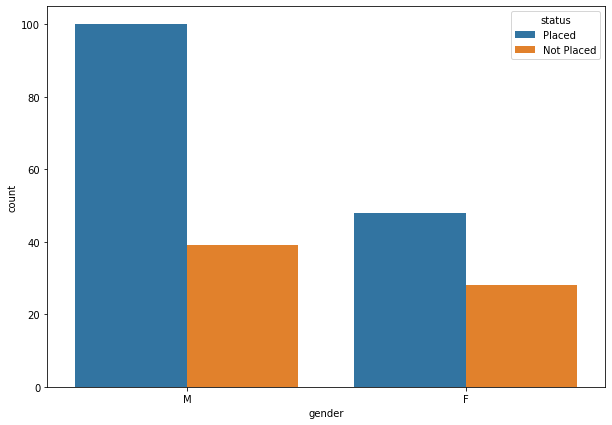

In [11]:
plt.figure(figsize = (10,7))
sns.countplot(x = "gender", hue = "status", data = df)

There are 139 Male studets and 76 Female students.

Male students have comparatively higher placemets. But this can be due to more number of male students. So I dont think this affects placements.

### 2) Whether Secondary Education affect placements

Text(0.5, 0, 'SSC Percentage')

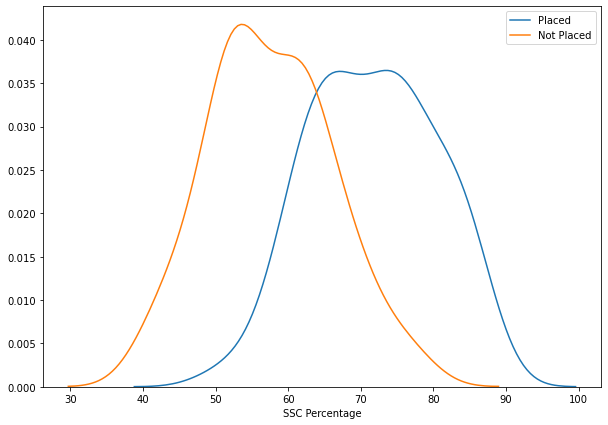

In [12]:
plt.figure(figsize = (10,7))
sns.kdeplot(df["ssc_p"][df["status"]=="Placed"])
sns.kdeplot(df["ssc_p"][df["status"]=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("SSC Percentage")

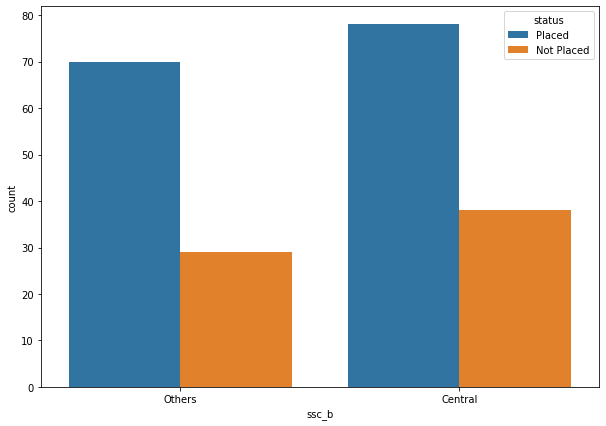

In [13]:
plt.figure(figsize = (10,7))
sns.countplot("ssc_b", hue="status", data=df)

Students with SSC Percentage above 90% are placed

Students with SSC Percentage below 40% are not-placed

Students with good SSC Percentage are placed on average.

SSC Percentage DOES affect the placement status.
Board Of Secondary Education DOES NOT affect much to Placement Status.

### 3) If Higher Secondary School affect Placements

Text(0.5, 0, 'HSC Percentage')

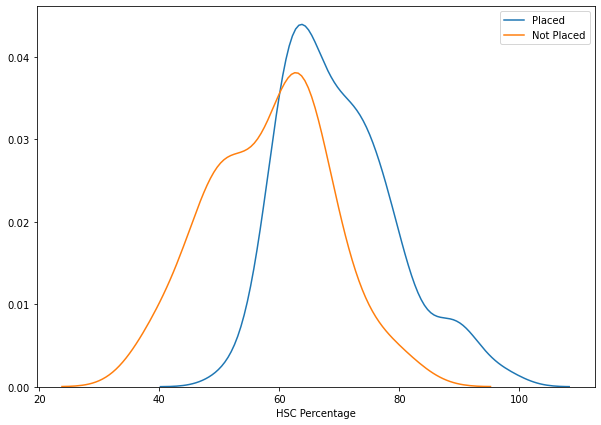

In [14]:
plt.figure(figsize = (10,7))
sns.kdeplot(df["hsc_p"][df["status"]=="Placed"])
sns.kdeplot(df["hsc_p"][df["status"]=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("HSC Percentage")

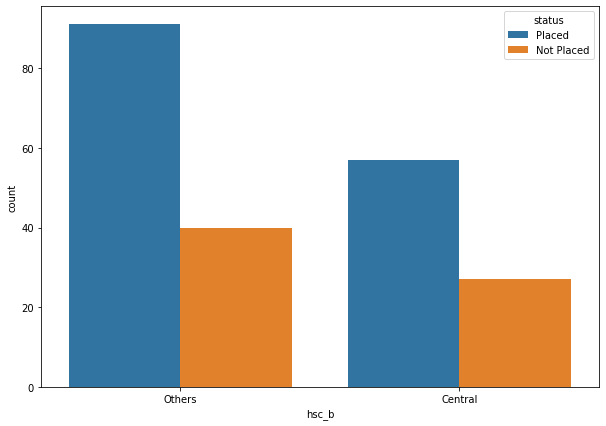

In [15]:
plt.figure(figsize = (10,7))
sns.countplot("hsc_b", hue="status", data=df)

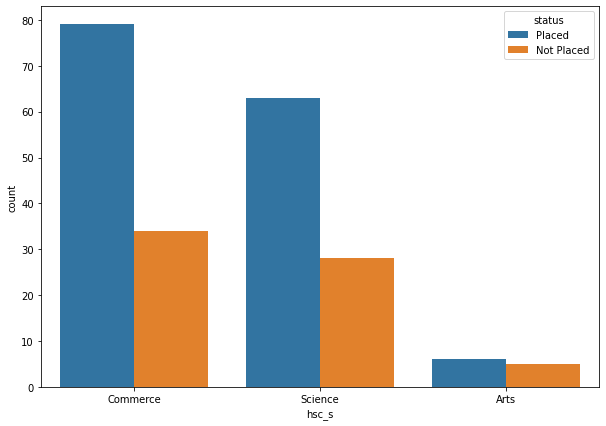

In [16]:
plt.figure(figsize = (10,7))
sns.countplot("hsc_s", hue="status", data=df)

More placements for percentage above 65%.

Drop in placements below 60%. Therefore, there might be a criteria that "Percentage must be atleast 60 for chance of being placed".

We have very less students with Arts specialization. Students from Science and Commerse field have good chance of placement.

HSC percentage and HSC Specialization DOES affect Placement Status. Board Of Higher Secondary Education DOES affect much to Placement Status.

### 4) Does Under Graduate affect placements?

Text(0.5, 0, 'UG Percentage')

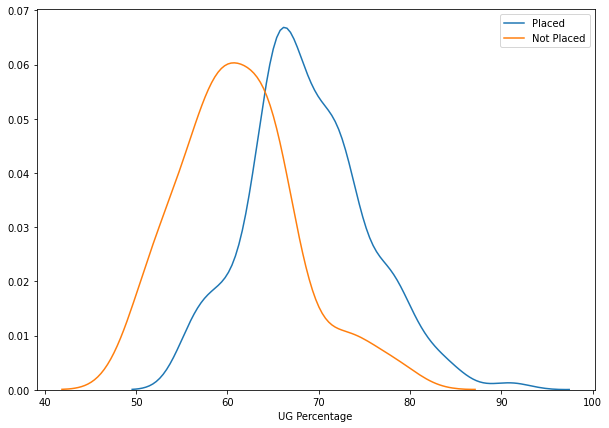

In [17]:
plt.figure(figsize = (10,7))
sns.kdeplot(df["degree_p"][df["status"]=="Placed"])
sns.kdeplot(df["degree_p"][df["status"]=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("UG Percentage")

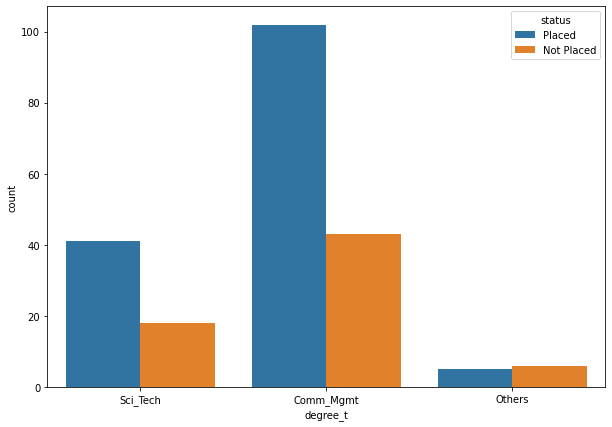

In [18]:
plt.figure(figsize = (10,7))
sns.countplot(x = "degree_t", hue = "status", data = df)

More placements for percentage above 65.

There are very less students with "Other". We cant make decision from few cases.

Around 2:1 placed:unplaced ratio for both Science and Commerse students.

UG percentage and UG Specialization DOES affect Placement Status.

### 5) Does Work Experience affect placements?

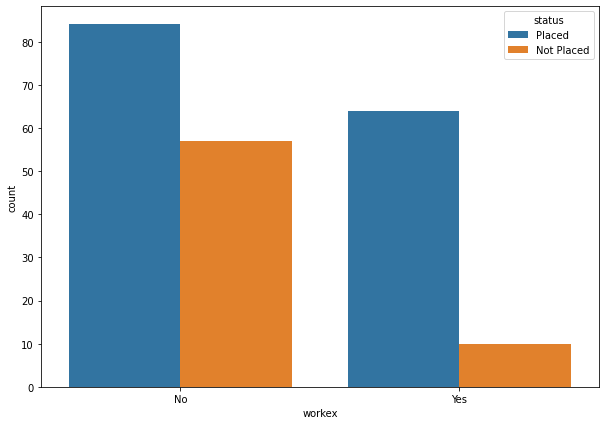

In [19]:
plt.figure(figsize = (10,7))
sns.countplot("workex", hue="status", data = df)

Work Exp DOES affect Placement. Very few students with work experience not getting placed.

### 6) Employability test percentage?

Text(0.5, 0, 'Employability test percentage')

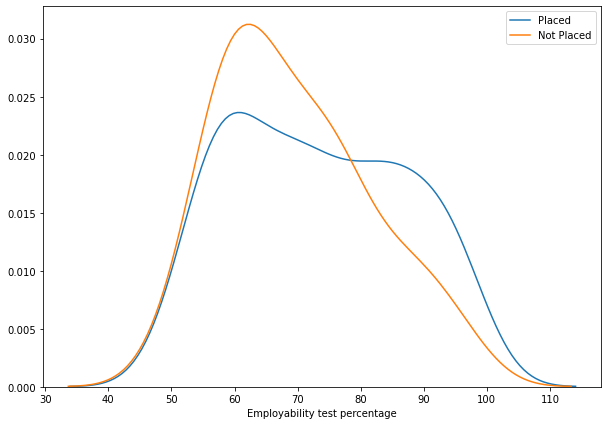

In [20]:
plt.figure(figsize = (10,7))
sns.kdeplot(df["etest_p"][df["status"]=="Placed"])
sns.kdeplot(df["etest_p"][df["status"]=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability test percentage")

More "Not Placed" are of 50%-70% range and more placed are of > 80% percentage range. Employability test percentage DOES affect Placement Status.

### 7) What about Post Graduate Specialization

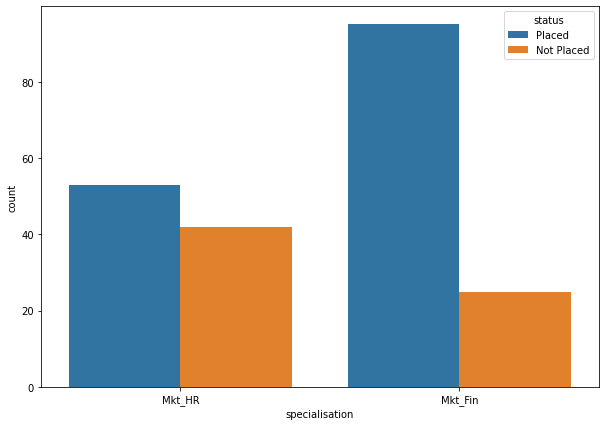

In [21]:
plt.figure(figsize = (10,7))
sns.countplot("specialisation", hue="status", data = df)

Text(0.5, 0, 'PG Percentage')

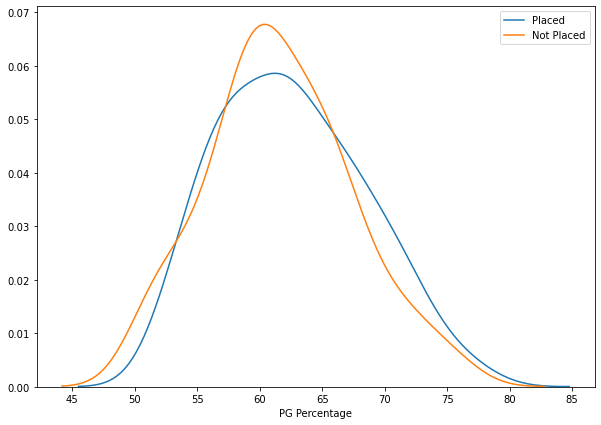

In [22]:
plt.figure(figsize = (10,7))
sns.kdeplot(df["mba_p"][df["status"]=="Placed"])
sns.kdeplot(df["mba_p"][df["status"]=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("PG Percentage")

MBA Specialization feature DOES affect Placement status.

Comparitively very low not-placed students in Mkt&Fin Section.

MBA Percentage DOES affect placement status. From 65% to 80% there are students placed.

## List of features which are important for placement status

SSC Percentage

HSC Percentage

HSC Board of Education

HSC Specialization

UG Percentage

UG Specialization

Work Experience

Employability test percentage

MBA Specialization

MBA Percentage

### Dropping SSC board of education, Gender and salary because they do not have much affect on Placement Status. Salary because, the discussion of salary is done after the student is placed. So, for predicting placement status we don't need salary

In [18]:
data = df.drop(["ssc_b","salary","gender","sl_no"], axis = 1)
data.head()

,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,67.00,91.00,Others,Commerce,58.00,Sci_Tech,No,55.0,Mkt_HR,58.80,Placed
1,79.33,78.33,Others,Science,77.48,Sci_Tech,Yes,86.5,Mkt_Fin,66.28,Placed
2,65.00,68.00,Central,Arts,64.00,Comm_Mgmt,No,75.0,Mkt_Fin,57.80,Placed
3,56.00,52.00,Central,Science,52.00,Sci_Tech,No,66.0,Mkt_HR,59.43,Not Placed
4,85.80,73.60,Central,Commerce,73.30,Comm_Mgmt,No,96.8,Mkt_Fin,55.50,Placed


## Feature Encoding

In [19]:
data = pd.get_dummies(data, drop_first = True)
data.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci_Tech,workex_Yes,specialisation_Mkt_HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,1,1,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,0,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,0,0,1,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,0,1,0,0,0,0,0,1


# Model Creation

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, recall_score, precision_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [21]:
X = data.drop(["status_Placed"],axis = 1)
y = data["status_Placed"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 71)

In [23]:
print("X_train shape is {}".format(X_train.shape))
print("X_test shape is {}".format(X_test.shape))
print("y_train shape is {}".format(y_train.shape))
print("y_test shape is {}".format(y_test.shape))

X_train shape is (150, 12)
X_test shape is (65, 12)
y_train shape is (150,)
y_test shape is (65,)


In [24]:
X.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci_Tech,workex_Yes,specialisation_Mkt_HR
0,67.00,91.00,58.00,55.0,58.80,1,1,0,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,0,0,0,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,0,0,1,0,1,0,1
4,85.80,73.60,73.30,96.8,55.50,0,1,0,0,0,0,0


## Decision Tree Classifier

In [25]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 71, class_weight = "balanced")
dt.fit(X_train, y_train)


y_pred_dt = dt.predict(X_test)


print('\nconfustion matrix') 
print(confusion_matrix(y_test, y_pred_dt))


print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt))
print("Recall:",metrics.recall_score(y_test, y_pred_dt))


print('\nclassification report')
print(classification_report(y_test, y_pred_dt))


confustion matrix
[[12  8]
 [ 3 42]]


Accuracy: 0.8307692307692308
Precision: 0.84
Recall: 0.9333333333333333

classification report
              precision    recall  f1-score   support

           0       0.80      0.60      0.69        20
           1       0.84      0.93      0.88        45

    accuracy                           0.83        65
   macro avg       0.82      0.77      0.78        65
weighted avg       0.83      0.83      0.82        65



In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt, pos_label=1) 
print('Area Under ROC Curve:', auc(fpr, tpr))
print("train Accuracy : ",dt.score(X_train,y_train))
print("test Accuracy : ",dt.score(X_test,y_test))

Area Under ROC Curve: 0.7666666666666666
train Accuracy :  1.0
test Accuracy :  0.8307692307692308


## Random Forest Classifier

In [27]:
rf = RandomForestClassifier(criterion='gini',n_estimators = 20, random_state = 71)
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)


print('\nconfustion matrix') 
print(confusion_matrix(y_test, y_pred_rf))


print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))


print('\nclassification report')
print(classification_report(y_test, y_pred_rf))


confustion matrix
[[13  7]
 [ 4 41]]


Accuracy: 0.8307692307692308
Precision: 0.8541666666666666
Recall: 0.9111111111111111

classification report
              precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.85      0.91      0.88        45

    accuracy                           0.83        65
   macro avg       0.81      0.78      0.79        65
weighted avg       0.83      0.83      0.83        65



In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf, pos_label=1) 
print('Area Under ROC Curve:', auc(fpr, tpr))
print("train Accuracy : ",rf.score(X_train,y_train))
print("test Accuracy : ",rf.score(X_test,y_test))

Area Under ROC Curve: 0.7805555555555554
train Accuracy :  1.0
test Accuracy :  0.8307692307692308


## K Nearest Neighbour Classification

In [29]:
knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(X_train,y_train)


y_pred_knn = knn.predict(X_test)


print('\nconfustion matrix') 
print(confusion_matrix(y_test, y_pred_rf))


print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:",metrics.precision_score(y_test, y_pred_knn))
print("Recall:",metrics.recall_score(y_test, y_pred_knn))


print('\nclassification report')
print(classification_report(y_test, y_pred_knn))


confustion matrix
[[13  7]
 [ 4 41]]


Accuracy: 0.8769230769230769
Precision: 0.8627450980392157
Recall: 0.9777777777777777

classification report
              precision    recall  f1-score   support

           0       0.93      0.65      0.76        20
           1       0.86      0.98      0.92        45

    accuracy                           0.88        65
   macro avg       0.90      0.81      0.84        65
weighted avg       0.88      0.88      0.87        65



In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn, pos_label=1) 
print('Area Under ROC Curve:', auc(fpr, tpr))
print("train Accuracy : ",knn.score(X_train,y_train))
print("test Accuracy : ",knn.score(X_test,y_test))

Area Under ROC Curve: 0.8138888888888889
train Accuracy :  0.8866666666666667
test Accuracy :  0.8769230769230769


### Calculating optimum number of neighbours

In [31]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

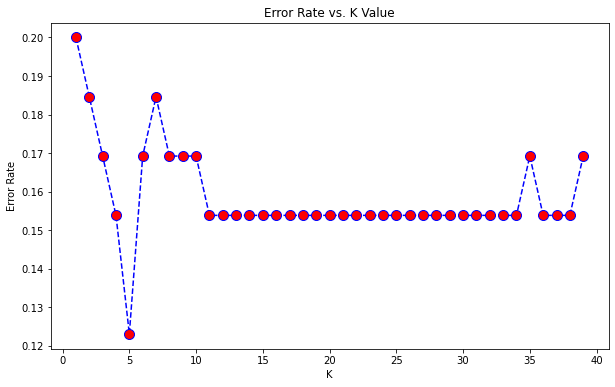

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Since Neighbours = 5 gives us least error, we use K = 5

## Logistic Regression

In [33]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)


y_pred_lr = lr.predict(X_test)


print('\nconfustion matrix') 
print(confusion_matrix(y_test, y_pred_lr))


print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))
print("Precision:",metrics.precision_score(y_test, y_pred_lr))
print("Recall:",metrics.recall_score(y_test, y_pred_lr))


print('\nclassification report')
print(classification_report(y_test, y_pred_lr))


confustion matrix
[[12  8]
 [ 2 43]]


Accuracy: 0.8461538461538461
Precision: 0.8431372549019608
Recall: 0.9555555555555556

classification report
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        20
           1       0.84      0.96      0.90        45

    accuracy                           0.85        65
   macro avg       0.85      0.78      0.80        65
weighted avg       0.85      0.85      0.84        65



In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr, pos_label=1) 
print('Area Under ROC Curve:', auc(fpr, tpr))
print("train Accuracy : ",lr.score(X_train,y_train))
print("test Accuracy : ",lr.score(X_test,y_test))

Area Under ROC Curve: 0.7777777777777778
train Accuracy :  0.9066666666666666
test Accuracy :  0.8461538461538461


## Model Accuracy

### We have applied 4 classification models without applying feature scaling. The accuracy is as follows:

Decision Tree Classifier -> 83.07%

Random Forest Classifier -> 83.07%

K Nearest Neighbour -> 87.6%

Logistic Regression -> 84.6%

### So we will use KNN Model for our deployment

# Model Deployment

In [40]:
import pickle

In [41]:
file = open('knn_model.pkl', 'wb')

In [42]:
pickle.dump(knn, open("knn_model.pkl", "wb"))

In [44]:
X_train.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci_Tech,workex_Yes,specialisation_Mkt_HR
29,62.00,67.00,58.0,77.00,51.29,1,0,1,0,0,0,0,0
206,41.00,42.00,60.0,97.00,53.39,1,0,0,1,0,0,0,0
46,70.89,71.98,65.6,68.00,71.63,0,1,0,1,0,0,0,1
95,73.00,78.00,65.0,95.46,62.16,1,1,1,0,0,0,1,0
104,69.00,63.00,65.0,55.00,58.23,1,1,0,1,0,0,1,1


In [35]:
X_train.shape

(150, 12)